# <center> <bold> Replicated Financial Data Time Series Forecasting Code</bold> </center>


# Data Loading

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/ritvik02/Financial-Data-Time-Series-Forecasting-Using-Neural-Networks/main/Code/train_new.csv/train_new.csv")

In [2]:
data.head()

,Unnamed: 0,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,...,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS,Cash
0,01/01/2015,40.94,53.630,159.28,110.38,65.44,90.16,38.06,45.02,89.31,...,43.290,92.45,53.27,36.5155,38.07,52.3831,113.42,28.510,43.03,0.0355
1,02/01/2015,40.56,53.910,158.56,109.33,65.89,90.46,37.31,44.90,88.84,...,43.600,92.83,51.93,36.2257,38.08,52.0236,112.59,28.290,43.31,0.0152
2,05/01/2015,39.80,53.875,156.47,106.25,64.65,89.69,37.07,44.91,87.34,...,42.795,90.29,51.57,35.4353,35.71,50.9666,116.79,27.230,43.05,0.0101
3,06/01/2015,39.18,53.040,156.36,106.26,64.33,90.18,36.13,44.40,86.71,...,42.180,89.81,50.93,34.9611,35.50,50.3410,115.80,26.190,42.63,0.0253
4,07/01/2015,39.70,53.010,159.72,107.75,66.93,91.98,37.28,44.76,88.53,...,42.195,90.72,52.25,35.4089,35.78,52.0092,118.68,26.435,43.51,0.0203


In [3]:
data.columns

Index(['Unnamed: 0', 'A ', 'AAL ', 'AAP ', 'AAPL ', 'ABBV ', 'ABC ', 'ABMD ',
       'ABT ', 'ACN ',
       ...
       'XLNX ', 'XOM ', 'XRAY ', 'XRX ', 'XYL ', 'YUM ', 'ZBH ', 'ZION ',
       'ZTS ', 'Cash'],
      dtype='object', length=507)

In [4]:
# sum of null values in the data
data.isna().sum()

Unnamed: 0    0
A             0
AAL           0
AAP           0
AAPL          0
             ..
YUM           0
ZBH           0
ZION          0
ZTS           0
Cash          0
Length: 507, dtype: int64

In [5]:
# # converting date column from object to datetime
# data['Unnamed: 0'] = pd.to_datetime(data['Unnamed: 0'])

# Trend Analysis

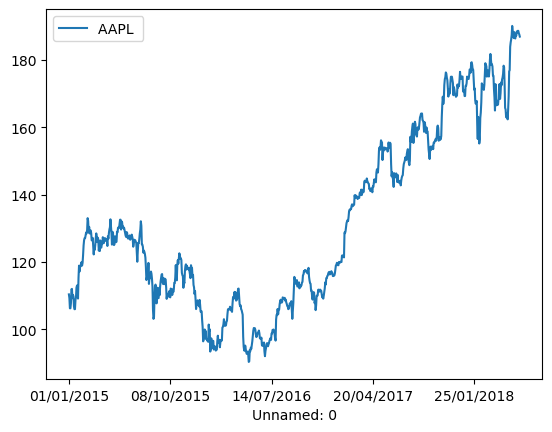

In [6]:
import matplotlib.pyplot as plt

# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

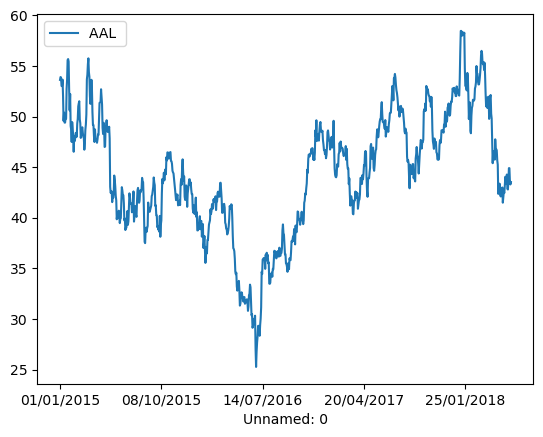

In [7]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'AAL ')
plt.show()

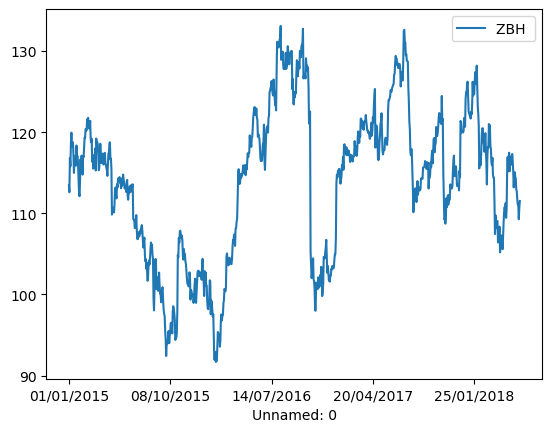

In [8]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'ZBH ')
plt.show()

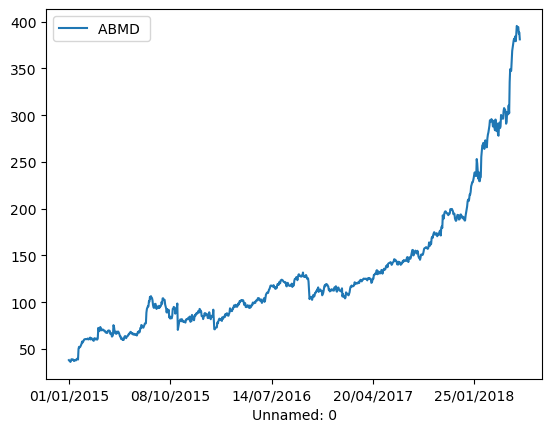

In [9]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'ABMD ')
plt.show()

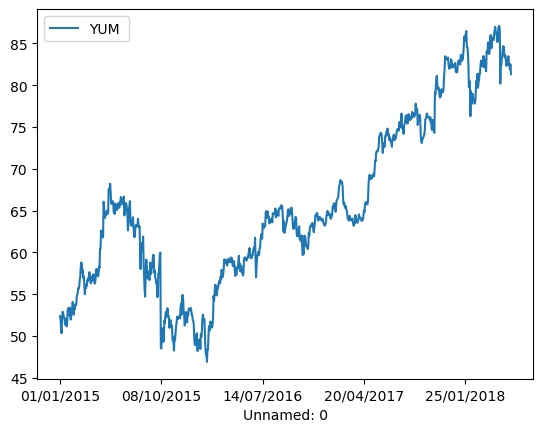

In [10]:
# using matplotlib to plot the data
data.plot.line(x = 'Unnamed: 0', y = 'YUM ')
plt.show()

# Selecting stock

In [11]:
data_stock = data['AAPL ']

In [12]:
data_stock.shape

(891,)

In [13]:
891 - 178


713

In [14]:
data_stock_np = np.array(data_stock)

In [15]:
data_stock_np[-15]

188.59

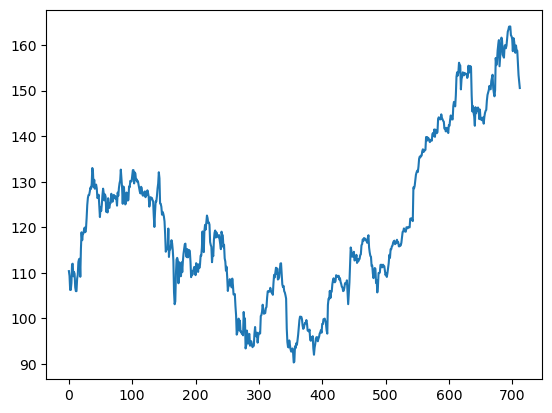

In [16]:
data_stock[:713].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

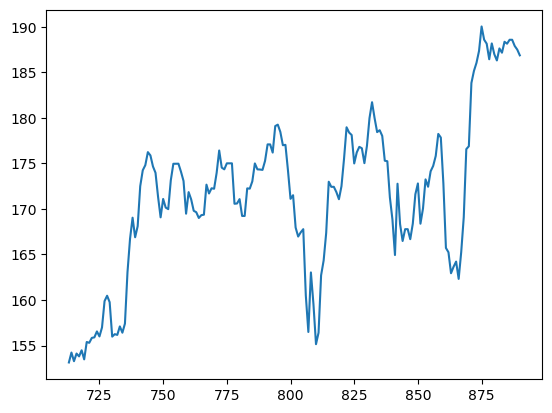

In [17]:
data_stock[-178:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

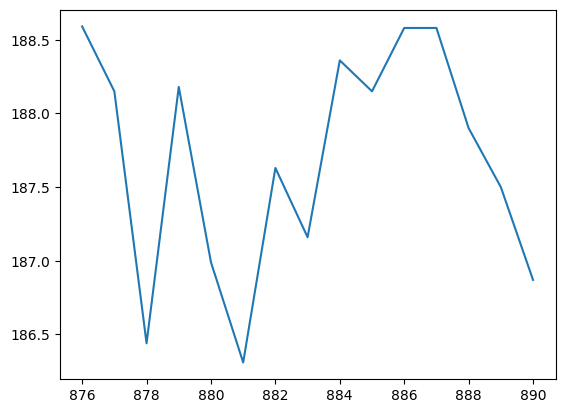

In [18]:
data_stock[-15:].plot.line(x = 'Unnamed: 0', y = 'AAPL ')
plt.show()

# Utility function

In [19]:
from pandas import Series
from pandas import concat
from pandas import read_csv
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Bidirectional
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy
from tensorflow.keras import layers

# converting the series data to supervised data
def series_data_to_supervised_data(data, lag=1):
	df = pd.DataFrame(data)
	columns = [df.shift(i) for i in range(1, lag+1)]
	columns.append(df)
	df = concat(columns, axis=1)
	df.fillna(0, inplace=True)
	return df

# finding difference between rows
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)

# inverting the difference value
def inverse_the_difference(history_data, yhat, interval=1):

  return (yhat+history_data[-interval])

# scaling the difference
def scale(train, test):
	# scaler
	scaler = MinMaxScaler(feature_range=(-1, 1))
	scaler = scaler.fit(train)

	train = train.reshape(train.shape[0], train.shape[1])
	train_scaled = scaler.transform(train)

	test = test.reshape(test.shape[0], test.shape[1])
	test_scaled = scaler.transform(test)
	return scaler, train_scaled, test_scaled

# inverse the scaling
def invert_scale(scaler, X, value):
	temp = [x for x in X] + [value]
	array = numpy.array(temp)
	array = array.reshape(1, len(array))
	data_inverted = scaler.inverse_transform(array)
	return data_inverted[0, -1]

# LSTM model
def fit_lstm(train, batchSize, epoch, neurons):
	X, y = train[:, 0:-1], train[:, -1]
	X = X.reshape(X.shape[0], 1, X.shape[1])
	model = Sequential()
	model.add(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True))
	model.add(Dense(1))

	model.compile(loss='mean_squared_error', optimizer='adam')
	for i in range(epoch):
		model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False)
		model.reset_states()
	return model


# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

def fit_rnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])


  #RNN model

  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  model = Sequential()
  model.add(layers.SimpleRNN(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')


  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


# make a one-step forecast
def forecast_rnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]

def fit_cnn(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  #CNN model
  model = Sequential()
  model.add(layers.Conv1D(neurons,1, batch_input_shape=(batchSize, X.shape[1], X.shape[2])))
  model.add(layers.GlobalMaxPooling1D())
  model.add(layers.Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

   #model.add(layers.Dense(3, activation='sigmoid'))
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model


# make a one-step forecast
def forecast_cnn(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]



def fit_bilstm(train,batchSize,epoch, neurons):
  X, y = train[:, 0:-1], train[:, -1]
  X = X.reshape(X.shape[0], 1, X.shape[1])
  model = Sequential()


  print("X.shape[1]), ",X.shape[1])
  print("X.shape[2]) ",X.shape[2])

  # Bi LSTM Model
  model = Sequential()
  model.add(Bidirectional(LSTM(neurons, batch_input_shape=(batchSize, X.shape[1], X.shape[2]), stateful=True)))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  #model.add(layers.Dense(3, activation='sigmoid'))
  for i in range(epoch):
    model.fit(X, y, epochs=1, batch_size=batchSize, verbose=0, shuffle=False )
    model.reset_states()
  return model


# make a one-step forecast
def forecast_bilstm(model, batch_size, X):
	X = X.reshape(1, 1, len(X))
	yhat = model.predict(X, batch_size=batch_size)
	return yhat[0,0]


# LSTM

In [20]:
data_stock.shape

(891,)

In [21]:
0.20 * 891

178.20000000000002

1/1 [==============================] - 0s 34ms/step

 Test RMSE: 2.370


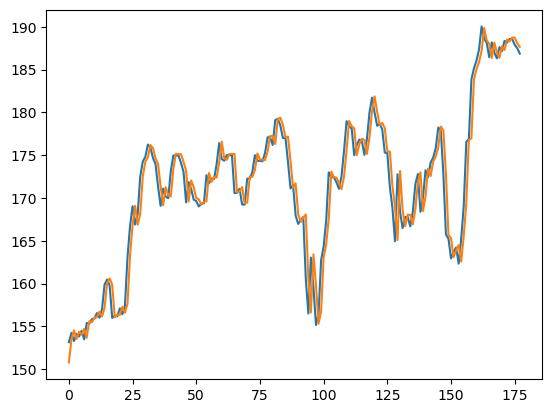

In [22]:

# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

1/1 [==============================] - 0s 33ms/step

 Test RMSE: 1.125


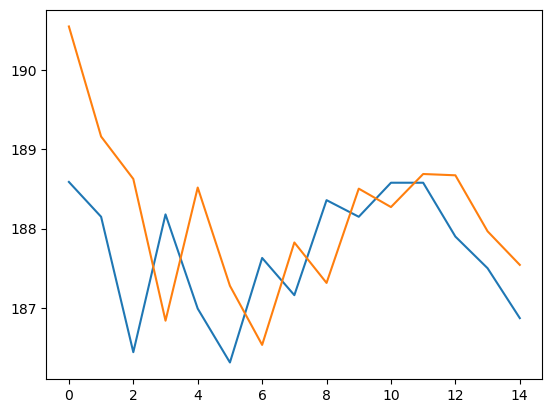

In [23]:

# modify data to be stationary
raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_lstm(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	#print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# RNN

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 30ms/step
Month=1, Predicted=150.858546, Expected=153.140000
1/1 [==============================] - 0s 31ms/step
Month=2, Predicted=153.036291, Expected=154.230000
1/1 [==============================] - 0s 30ms/step
Month=3, Predicted=154.275633, Expected=153.280000
1/1 [==============================] - 0s 35ms/step
Month=4, Predicted=153.547355, Expected=154.120000
1/1 [==============================] - 0s 35ms/step
Month=5, Predicted=154.192395, Expected=153.810000
1/1 [==============================] - 0s 37ms/step
Month=6, Predicted=154.008013, Expected=154.480000
1/1 [==============================] - 0s 34ms/step
Month=7, Predicted=154.570775, Expected=153.480000
1/1 [==============================] - 0s 32ms/step
Month=8, Predicted=153.752692, Expected=155.390000
1/1 [==============================] - 0s 33ms/step
Month=9, Predicted=155.351098, Expected=155.300000
1/1 [==============================] - 0s 

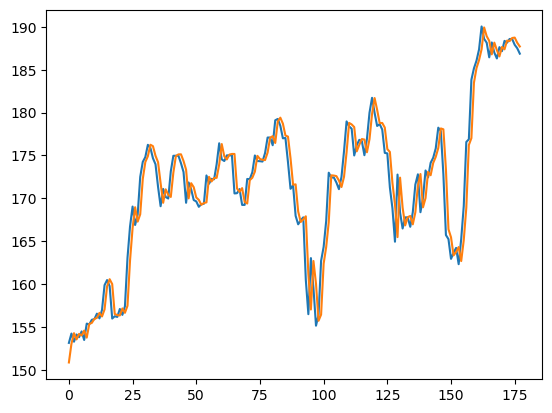

In [24]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 31ms/step
Month=1, Predicted=190.515305, Expected=188.590000
1/1 [==============================] - 0s 30ms/step
Month=2, Predicted=188.473870, Expected=188.150000
1/1 [==============================] - 0s 32ms/step
Month=3, Predicted=188.176493, Expected=186.440000
1/1 [==============================] - 0s 39ms/step
Month=4, Predicted=186.289961, Expected=188.180000
1/1 [==============================] - 0s 37ms/step
Month=5, Predicted=188.530675, Expected=186.990000
1/1 [==============================] - 0s 33ms/step
Month=6, Predicted=186.909095, Expected=186.310000
1/1 [==============================] - 0s 35ms/step
Month=7, Predicted=186.301352, Expected=187.630000
1/1 [==============================] - 0s 30ms/step
Month=8, Predicted=187.920263, Expected=187.160000
1/1 [==============================] - 0s 32ms/step
Month=9, Predicted=187.182069, Expected=188.360000
1/1 [==============================] - 0s 

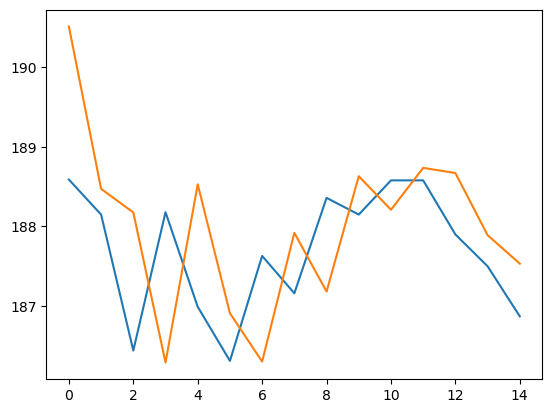

In [25]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_rnn(train_scaled, 1, 1, 4)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_rnn(lstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# CNN Model


X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 33ms/step
Month=1, Predicted=150.999398, Expected=153.140000
1/1 [==============================] - 0s 30ms/step
Month=2, Predicted=152.803142, Expected=154.230000
1/1 [==============================] - 0s 31ms/step
Month=3, Predicted=154.193240, Expected=153.280000
1/1 [==============================] - 0s 32ms/step
Month=4, Predicted=153.651373, Expected=154.120000
1/1 [==============================] - 0s 31ms/step
Month=5, Predicted=154.133256, Expected=153.810000
1/1 [==============================] - 0s 33ms/step
Month=6, Predicted=154.053331, Expected=154.480000
1/1 [==============================] - 0s 33ms/step
Month=7, Predicted=154.527267, Expected=153.480000
1/1 [==============================] - 0s 33ms/step
Month=8, Predicted=153.861376, Expected=155.390000
1/1 [==============================] - 0s 30ms/step
Month=9, Predicted=155.189186, Expected=155.300000
1/1 [==============================] - 0s 

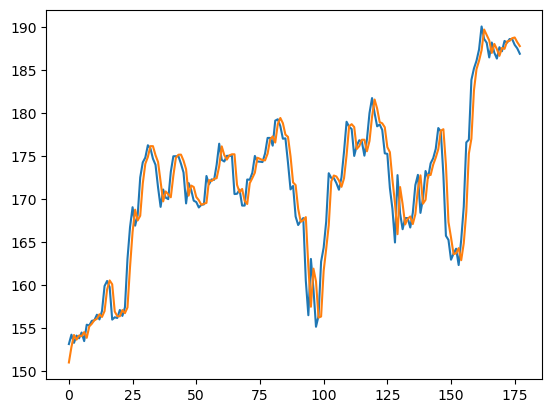

In [26]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 37ms/step
Month=1, Predicted=190.064803, Expected=188.590000
1/1 [==============================] - 0s 32ms/step
Month=2, Predicted=188.776842, Expected=188.150000
1/1 [==============================] - 0s 30ms/step
Month=3, Predicted=188.297215, Expected=186.440000
1/1 [==============================] - 0s 27ms/step
Month=4, Predicted=186.637043, Expected=188.180000
1/1 [==============================] - 0s 29ms/step
Month=5, Predicted=188.241683, Expected=186.990000
1/1 [==============================] - 0s 32ms/step
Month=6, Predicted=187.166641, Expected=186.310000
1/1 [==============================] - 0s 32ms/step
Month=7, Predicted=186.466631, Expected=187.630000
1/1 [==============================] - 0s 33ms/step
Month=8, Predicted=187.708162, Expected=187.160000
1/1 [==============================] - 0s 34ms/step
Month=9, Predicted=187.308392, Expected=188.360000
1/1 [==============================] - 0s 

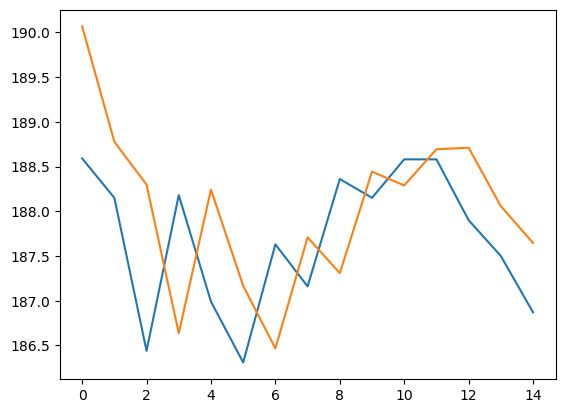

In [27]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-15], supervised_values[-15:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
cnn_model = fit_cnn(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
cnn_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_cnn(cnn_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-15:], predictions))
print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-15:])
pyplot.plot(predictions)
pyplot.show()

# Bi-directional LSTM


X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 27ms/step
Month=1, Predicted=150.857409, Expected=153.140000
1/1 [==============================] - 0s 32ms/step
Month=2, Predicted=153.294014, Expected=154.230000
1/1 [==============================] - 0s 36ms/step
Month=3, Predicted=154.347763, Expected=153.280000
1/1 [==============================] - 0s 30ms/step
Month=4, Predicted=153.464256, Expected=154.120000
1/1 [==============================] - 0s 34ms/step
Month=5, Predicted=154.264055, Expected=153.810000
1/1 [==============================] - 0s 33ms/step
Month=6, Predicted=153.980908, Expected=154.480000
1/1 [==============================] - 0s 31ms/step
Month=7, Predicted=154.623137, Expected=153.480000
1/1 [==============================] - 0s 31ms/step
Month=8, Predicted=153.676675, Expected=155.390000
1/1 [==============================] - 0s 34ms/step
Month=9, Predicted=155.492840, Expected=155.300000
1/1 [==============================] - 0s 

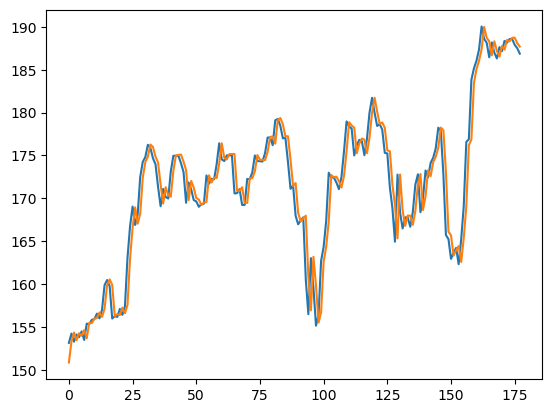

In [28]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-178], supervised_values[-178:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-178:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-178:])
pyplot.plot(predictions)
pyplot.show()

## Over 15 test rows

X.shape[1]),  1
X.shape[2])  1
1/1 [==============================] - 0s 29ms/step
Month=1, Predicted=187.137314, Expected=186.310000
1/1 [==============================] - 0s 28ms/step
Month=2, Predicted=186.518677, Expected=187.630000
1/1 [==============================] - 0s 27ms/step
Month=3, Predicted=187.728263, Expected=187.160000
1/1 [==============================] - 0s 31ms/step
Month=4, Predicted=187.309943, Expected=188.360000
1/1 [==============================] - 0s 30ms/step
Month=5, Predicted=188.415160, Expected=188.150000
1/1 [==============================] - 0s 28ms/step
Month=6, Predicted=188.249773, Expected=188.580000
1/1 [==============================] - 0s 31ms/step
Month=7, Predicted=188.658451, Expected=188.580000
1/1 [==============================] - 0s 31ms/step
Month=8, Predicted=188.678007, Expected=187.900000
1/1 [==============================] - 0s 30ms/step
Month=9, Predicted=188.064169, Expected=187.500000
1/1 [==============================] - 0s 

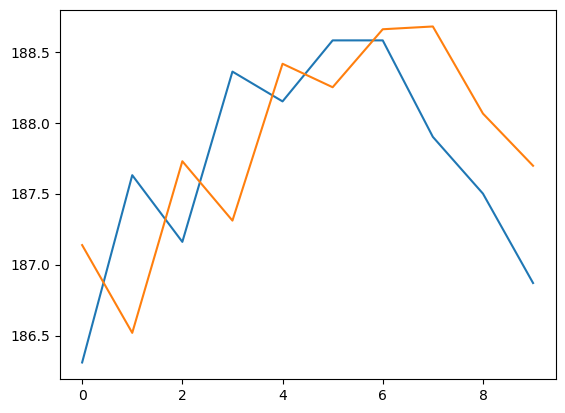

In [29]:

raw_values = np.array(data_stock)
diff_values = difference(raw_values, 1)
# modify data to be supervised
supervised = series_data_to_supervised_data(diff_values, 1)
supervised_values = supervised.values

# split data
train, test = supervised_values[0:-10], supervised_values[-10:]

# modify the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
bilstm_model = fit_bilstm(train_scaled, 1, 1, 1)

# forecast
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
bilstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
	# make one-step forecast
	X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
	yhat = forecast_bilstm(bilstm_model, 1, X)
	# invert scaling
	yhat = invert_scale(scaler, X, yhat)

	yhat = inverse_the_difference(raw_values, yhat, len(test_scaled)-i+1)
	# store forecast
	predictions.append(yhat)
	expected = raw_values[len(train) + i + 1]
	print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


##print("X and y data : ", X ," y = ",y )
#print("yhat = ", yhat)
# report performance
rmse = sqrt(mean_squared_error(raw_values[-10:], predictions))
print('\n Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(raw_values[-10:])
pyplot.plot(predictions)
pyplot.show()

# Arima Model

In [30]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [31]:
import numpy as np
data_stock_np = np.array(data_stock)

In [32]:
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
import numpy as np
from matplotlib import pyplot

#data = data[['Date']]
data = np.asarray(data_stock_np)



C:\Users\jaypa\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  891
Model:                 ARIMA(5, 1, 5)   Log Likelihood               -1798.906
Date:                Fri, 15 Dec 2023   AIC                           3619.812
Time:                        21:27:53   BIC                           3672.515
Sample:                             0   HQIC                          3639.955
                                - 891                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3001      0.683     -1.903      0.057      -2.639       0.039
ar.L2         -0.8280      1.516     -0.546      0.585      -3.800       2.144
ar.L3          0.5055      1.932      0.262      0.7

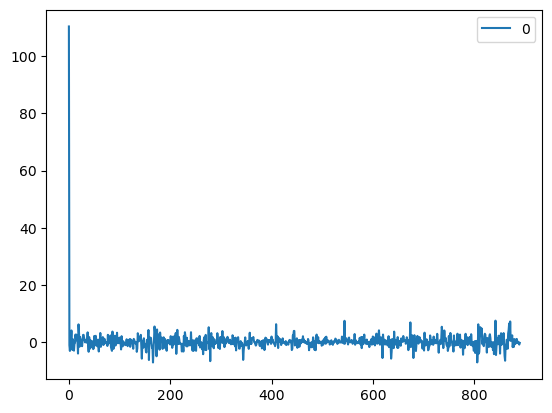

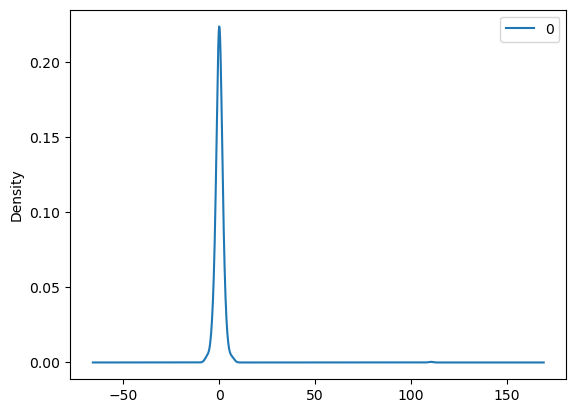

                0
count  891.000000
mean     0.205665
std      4.121053
min     -7.087373
25%     -0.734104
50%      0.052547
75%      0.965916
max    110.380000


In [33]:
model = ARIMA(data, order=(5,1,5))

model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

predicted=143.608176, expected=144.770000
predicted=144.784362, expected=144.020000
predicted=143.977548, expected=143.660000
predicted=143.644291, expected=143.340000
predicted=143.377365, expected=143.170000
predicted=143.160002, expected=141.630000
predicted=141.657881, expected=141.800000
predicted=141.878979, expected=141.050000
predicted=141.114360, expected=141.050000
predicted=141.078864, expected=141.830000
predicted=141.928846, expected=141.200000
predicted=141.160754, expected=140.680000
predicted=140.688279, expected=142.440000
predicted=142.505570, expected=142.270000
predicted=142.200036, expected=143.640000
predicted=143.610734, expected=144.530000
predicted=144.512529, expected=143.680000
predicted=143.517691, expected=143.790000
predicted=143.783120, expected=143.650000
predicted=143.626870, expected=146.580000
predicted=146.588935, expected=147.510000
predicted=147.453348, expected=147.060000
predicted=146.890607, expected=146.530000
predicted=146.490825, expected=148

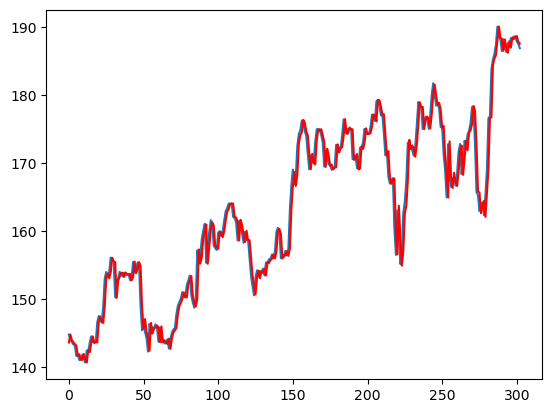

In [34]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

predicted=190.044783, expected=188.590000
predicted=188.250956, expected=188.150000
predicted=188.039589, expected=186.440000
predicted=186.285071, expected=188.180000
predicted=187.965689, expected=186.990000
predicted=186.603641, expected=186.310000
predicted=185.976972, expected=187.630000
predicted=187.693149, expected=187.160000
predicted=186.828252, expected=188.360000
predicted=188.257974, expected=188.150000
predicted=188.076107, expected=188.580000
predicted=188.450625, expected=188.580000
predicted=188.540922, expected=187.900000
predicted=187.723895, expected=187.500000
predicted=187.417436, expected=186.870000
Test RMSE: 1.024


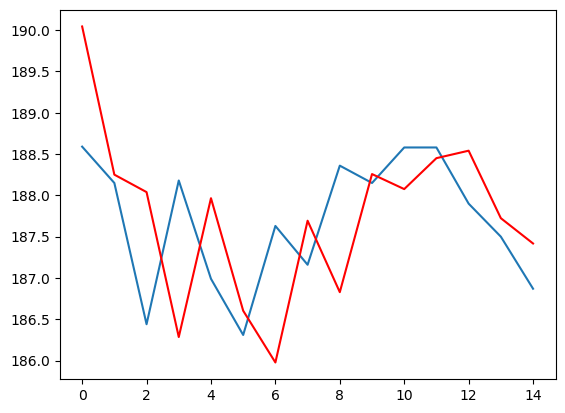

In [35]:
from math import sqrt
from sklearn.metrics import mean_squared_error
X = data
size = 876
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,1))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)

pyplot.plot(predictions, color='red')
pyplot.show()

# Make results for comparision

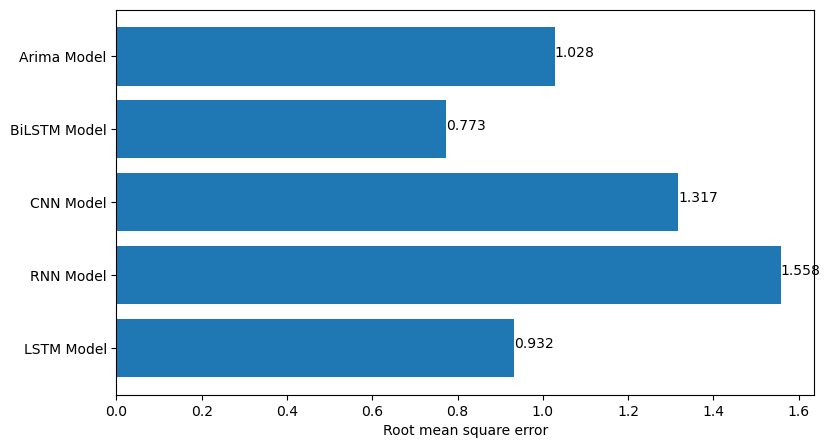

In [36]:
plt.figure(figsize=(9, 5))

# models
Models_used = ["LSTM Model", "RNN Model", "CNN Model","BiLSTM Model","Arima Model"]

# metrics of the model in list format
rmse_of_models = [0.932,1.558, 1.317 ,0.773,1.028]

plt.barh(Models_used, rmse_of_models)
plt.xlabel("Root mean square error")
for index, value in enumerate(rmse_of_models):
    plt.text(value, index,
             str(value))

plt.show()

# References:

[1]: R. Khandelwal, P. Marfatia, S. Shah, V. Joshi, P. Kamath and K. Chavan, "Financial Data Time Series Forecasting Using Neural Networks and a Comparative Study," 2022 International Conference for Advancement in Technology (ICONAT), Goa, India, 2022, pp. 1-6, doi: 10.1109/ICONAT53423.2022.9725845.

[2]: R. Khandelwal (2022, January 28). Financial-Data-Time-Series-Forecasting-Using-Neural-Networks. https://github.com/ritvik02/Financial-Data-Time-Series-Forecasting-Using-Neural-Networks

#### **Research Paper Link:** https://github.com/ritvik02/Financial-Data-Time-Series-Forecasting-Using-Neural-Networks/blob/main/Paper.pdf

#### **Source Link:** https://ieeexplore.ieee.org/document/9725845